In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [11]:
def get_feature_matrix(masstime, data, significant=True):
    if not significant:
        return data.iloc[3:,8:].to_numpy(dtype=float).T
    inds=[]
    for i in range(3,data.shape[0]):
        mt=data.iloc[i,4] + '@' + data.iloc[i,5]
        if mt in masstime:
            inds.append(i)
    inds=np.unique(np.asarray(inds, dtype=int))
    return data.iloc[inds,8:].to_numpy(dtype=float).T

def get_features(masstime, data, significant=True):
    if not significant:
        return data
    inds=[0,1,2]
    for i in range(3,data.shape[0]):
        mt=data.iloc[i,4] + '@' + data.iloc[i,5]
        if mt in masstime:
            inds.append(i)
    inds=np.unique(np.asarray(inds, dtype=int))
    return data.iloc[inds,:]


def get_ids(data):
    ID=[]
    for line in data.iloc[2,8:]:
        ID.append(line.split('_')[-1].split('.')[0])
    return np.array(ID)

def add_noise(x, magnitude):
    return x + np.random.normal(0,magnitude, x.shape)


def sortedMask2assignments(mask):
    n = mask.shape[0]
    assignments = np.zeros((n,))
    k=0
    bound=-1
    for i in range(n):
        if i<bound:
            continue
        for j in range(i, n):
            if mask[i,j]==1:
                assignments[j]=k
            else:
                k+=1
                break
        bound=j
    return assignments

def mask2assignments(mask):
    n = mask.shape[0]
    assignments = np.zeros((n,))
    k=0
    assigned=[]
    for i in range(n):
        if i in assigned:
            continue
        for j in range(i, n):
            if mask[i,j]==1:
                assignments[j]=k
                assigned.append(j)    
        k+=1
    return assignments

In [3]:
fnum=1
pathGF = "../../../PDproj/celldata/datawithGFstatus/clean/"
filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
print(filenamesGF[fnum])
data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

path_s2 = "../../../PDproj/cellresults/ttest/withGF/only32/ALPHA0.05FC1.0MINVAR0.125/"
filenames_s2 = [line.split('\n')[0] for line in open(path_s2 + "filenames.txt")]
print(filenames_s2[fnum])
df_select = pd.read_csv(path_s2 + filenames_s2[fnum],sep=';')

cellshilicposGFstatus.csv
cellshilicposALPHA0.05FC1.0MINVAR0.125.csv


In [4]:
masstime = np.unique(df_select[' masstime'].to_numpy())
data_significant=get_features(masstime, data, True)

Area = data_significant.iloc[3:,8:48]
groups = data.iloc[0,8:48]
labels = LabelEncoder().fit_transform(groups)

In [5]:
Area.shape

(58, 40)

In [6]:
data_significant.shape

(61, 128)

In [7]:
data_significant.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aSYN,aSYN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Name,Formula,Annot. DeltaMass [ppm],Calc. MW,m/z,RT [min],MS2,Reference Ion,Area: 221003_SarkaLehtonen_Hilic_pos_0088.raw ...,Area: 221003_SarkaLehtonen_Hilic_pos_0092.raw ...,...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...
4,Acetyl-L-carnitine,C9 H17 N O4,0.8,203.11592,204.1232,2.791,DDA for preferred ion,[M+H]+1,26.82393260341057,26.966564272710535,...,0,0,0,0,0,0,0,0,0,0
12,Nicotinamide,C6 H6 N2 O,2.49,122.04832,123.05559,0.665,No MS2,[M+H]+1,22.006117213600273,22.07771837617395,...,0,0,0,64,0,64,64,0,64,0


In [8]:
sorted_ind=np.argsort(data_significant.iloc[3:,5])

In [9]:
data_significant.iloc[sorted_ind+3,:].head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
94,NaN,C30 H57 N O4,-0.07,495.42873,496.436,0.372,No MS2,[M+H]+1,19.054911837856597,18.620844098722333,...,0,0,0,0,0,0,0,0,64,0
106,NaN,C30 H54 O4,-0.21,478.40211,496.436,0.373,No MS2,[M+NH4]+1,19.054911837856597,18.620844098722333,...,64,64,64,64,64,64,64,64,0,64
24,13-hydroxy-alpha-tocopherol,C29 H50 O3,0.19,446.37608,447.38325,0.374,DDA for preferred ion,[M+H]+1,20.88434273807616,20.704578329289475,...,0,0,0,0,0,0,0,0,0,0
303,MFCD09743629,C27 H48 O2,0.67,404.3657,405.3727,0.378,No MS2,[M+H]+1,16.552989929027294,16.172452223805614,...,128,8,8,128,8,128,128,128,128,128
245,NaN,C21 H49 N4 O3 P,1.94,436.35507,419.35186,0.381,No MS2,[M+H-H2O]+1,17.760054334192844,17.391996173856526,...,64,64,64,64,64,128,64,64,128,128


In [10]:
X=data_significant.iloc[sorted_ind+3,8:48].to_numpy(dtype=float).T
rtime=data_significant.iloc[sorted_ind+3,5].to_numpy(dtype=float)[:,np.newaxis]
#Area_sorted=Area_significant.iloc[sorted_ind,:]

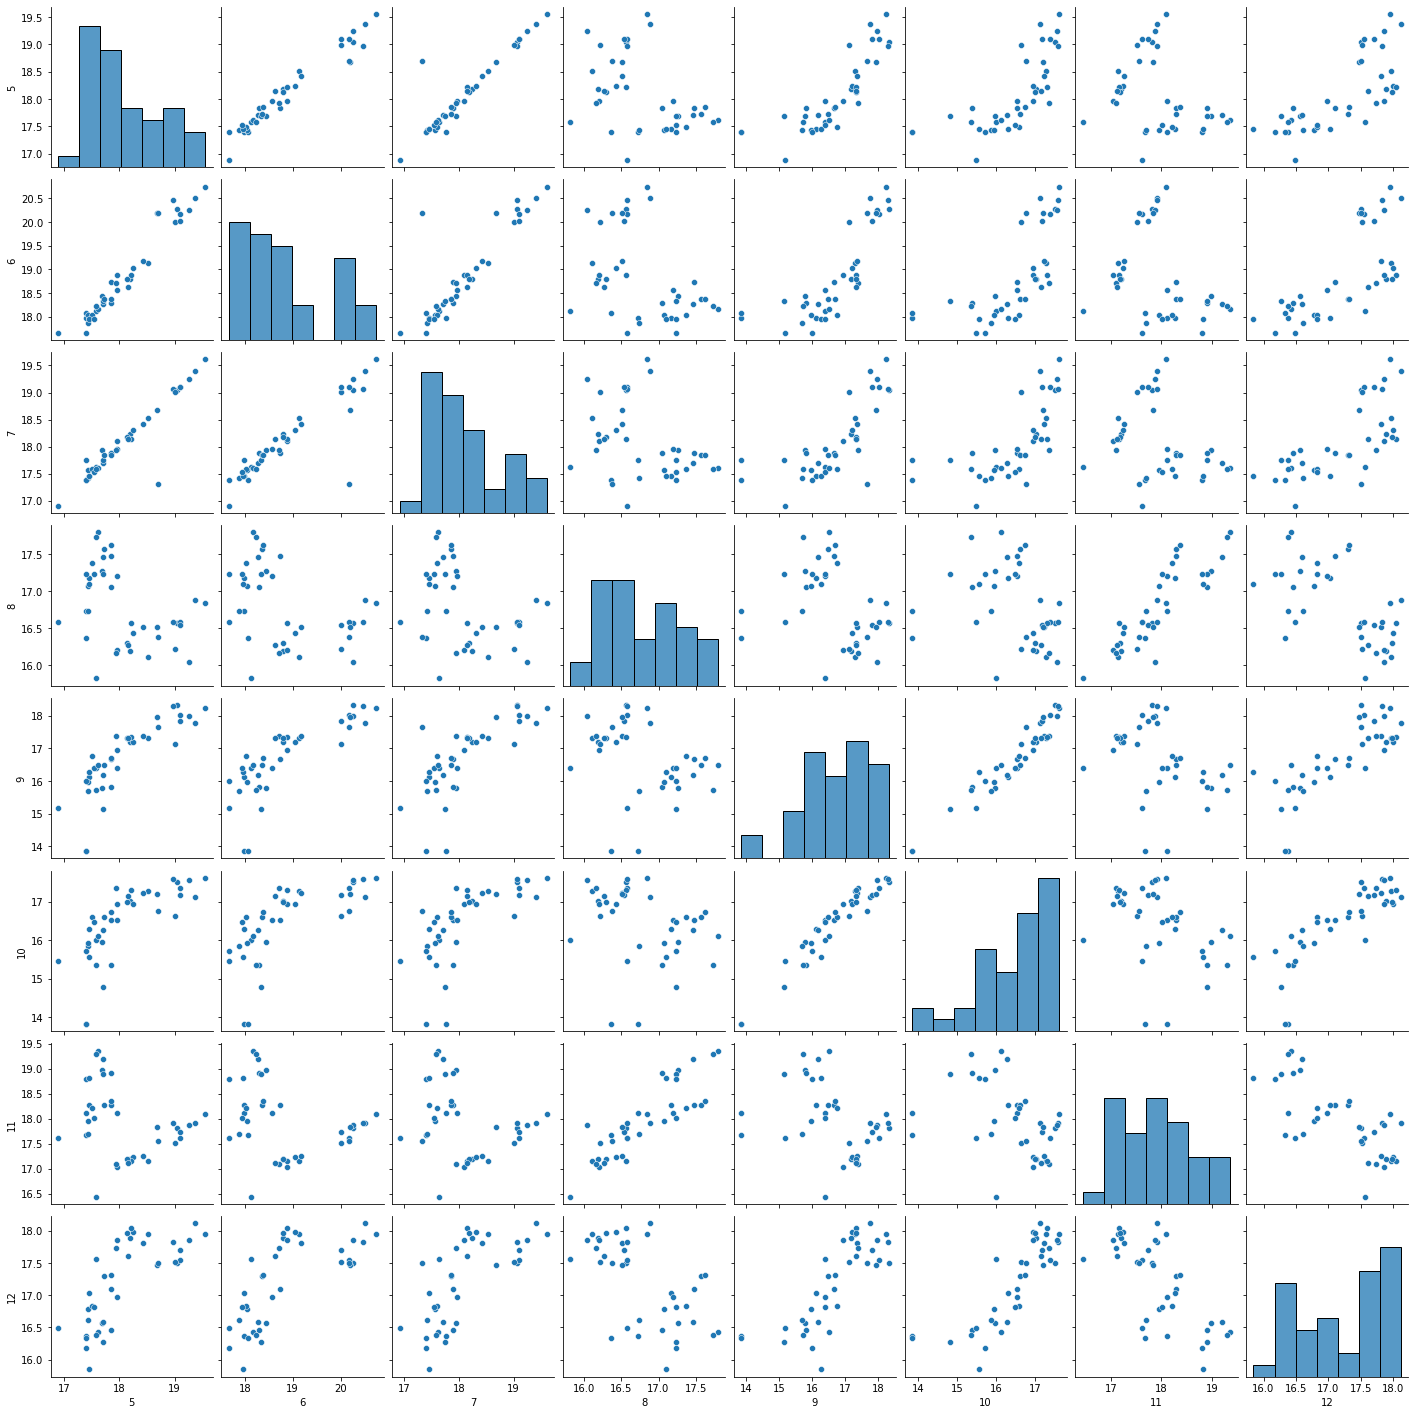

In [11]:
cols=np.arange(5,13)
sns.pairplot(pd.DataFrame(X[:,cols],columns=np.asarray(cols, dtype=str)),)

In [68]:
dt=0.1
mask=np.asarray(np.abs(rtime-rtime.T)<=dt,dtype=int)

In [140]:
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(X)
cov_mat =np.cov(X_std.T, ddof=0)*mask

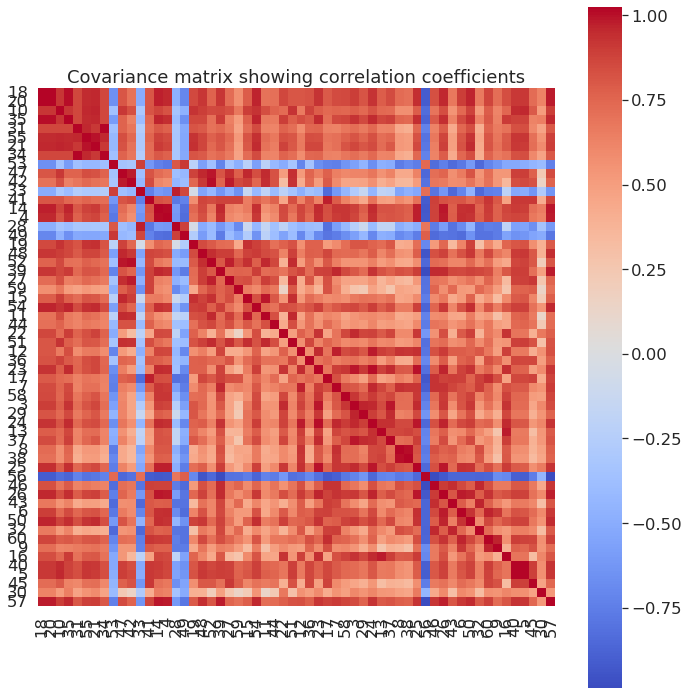

In [176]:
cols = np.asarray(sorted_ind+3,dtype=str)
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(X)
cov_mat =np.cov(X_std.T)#*mask
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=False,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

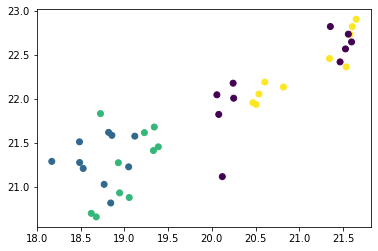

In [84]:
plt.scatter(X[:40,0],X[:40,2],c=labels)

In [158]:
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(X)
cov_mat =np.cov(X_std.T, ddof=0)#*mask

In [159]:
CD=1 - cov_mat
CD-=np.eye(CD.shape[0])*np.diagonal(CD)

In [160]:
cd_matrix = squareform(CD,force='tovector')
cd_matrix.shape

(1653,)

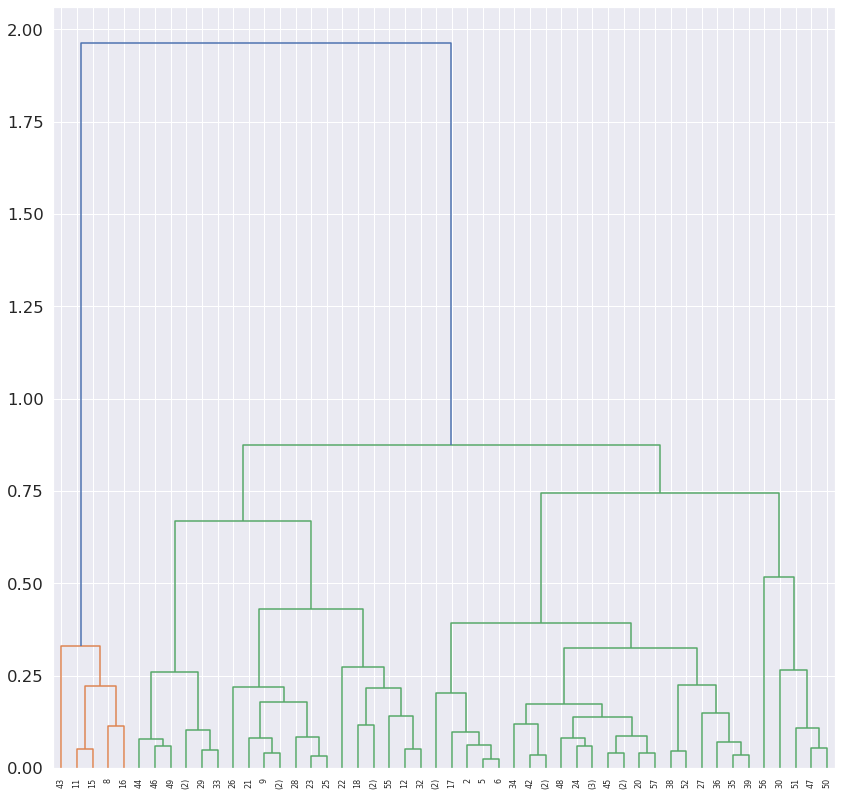

In [177]:
plt.figure(figsize=(14,14))
link_complete = hierarchy.linkage(cd_matrix, method='complete',  optimal_ordering=False)
hierarchy.dendrogram(link_complete, truncate_mode='lastp', p=50, labels=np.asarray(np.arange(COV.shape[0])))
labels_complete=hierarchy.fcluster(link_complete, t=0.4, criterion='distance')

In [178]:
labels_complete

array([5, 5, 5, 5, 5, 5, 5, 5, 1, 3, 3, 1, 4, 5, 5, 1, 1, 5, 4, 3, 5, 3,
       4, 3, 5, 3, 3, 5, 3, 2, 6, 5, 4, 2, 5, 5, 5, 5, 5, 5, 2, 2, 5, 1,
       2, 5, 2, 6, 5, 2, 6, 6, 5, 4, 4, 4, 7, 5], dtype=int32)

In [180]:
dt=0.05
mask=np.asarray(np.abs(rtime-rtime.T)<=dt,dtype=int)
mask2assignments(mask)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        2.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  5.,  5.,  6.,  6.,
        7.,  8.,  9., 10., 10., 11., 12., 13., 14., 14., 15., 15., 15.,
       16., 17., 17., 18., 19., 19., 19., 20., 21., 22., 22., 23., 24.,
       25., 26., 26., 26., 27., 28.])

## ANOVA

In [14]:
data =data_significant.iloc[sorted_ind+3,:] 
X=data.iloc[:,8:48].to_numpy(dtype=float).T

In [12]:
from statsmodels.formula.api import ols

In [19]:
data.iloc[2,0]

'13-hydroxy-alpha-tocopherol'

In [34]:
np.where(data.iloc[:,0]=="MFCD00042876")

(array([19]),)

In [35]:
k=19
print(data.iloc[k,0])
xdata = pd.DataFrame(np.hstack((X[:,k][:,np.newaxis],labels[:,np.newaxis])), columns=['area','group'])
res = ols(formula="area~0 + C(group)", data=xdata).fit()
res.summary()

MFCD00042876


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     20.05
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           8.21e-08
Time:                        13:02:46   Log-Likelihood:                -36.410
No. Observations:                  40   AIC:                             80.82
Df Residuals:                      36   BIC:                             87.58
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
C(group)[0.0]    17.1515      0.200     85.574      0.000      16.745      17.558
C(group)[1.0]    15.9549      0.200     79.604      0.000      15.548      16.361
C(group)[2.0]    15.5732      0.200     77.700      0.000      15.167      15.980
C(group)[3.0]    17.4154      0.200     86.891      0.000      17.009      17.822
==============================================================================
Omnibus:                       18.660   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.421
Skew:                          -1.449   Prob(JB):                     4.98e-06
Kurtosis:                       5.500   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
res.tvalues

C(group)[0.0]    85.574404
C(group)[1.0]    79.604158
C(group)[2.0]    77.699851
C(group)[3.0]    86.891238
dtype: float64